# Project 2:  Kaggle Ames Housing  Data Analysis 

This is the second project of Data Science Immersive course in General Assembly's submitted by July 2021.

The **Ames Housing Price Analysis** data was used to come up with a prediction model for house sales. The project defined the problem of the statement, explore the data, perform EDA, clean the data, engineered the features based on their distribution, and made a possible prediction on the property sale prices using Multilinear Regression models together with Lasso and Ridge regularization.


### Overview

In the current housing market, so many factors affect the price trend most importantly rooms numbers, size, location of the house, built years, and construction materials are among the top list. The property prices can highly fluctuate with economic conditions, housing demand in the region, pandemic(like covid 19 cases), government tax, and regulations, mortgage rates, neighborhood infrastructures development, etc (sources: https://www.noradarealestate.com/blog/housing-market-predictions/.  However, it can be possible to predict the trend of the house sales price with the collected property features over certain times and regions to help real estate businesses and consulting house buyers for their optimal benefit. The most important features of the house in Ames city in Iowa were employed for fair prices prediction from the given features for the use of real estate agents and the buyers.


### Problem Statement


The project aimed to make a prediction model to get the optimal house sale price with a corresponding Id at a better accuracy level that can help businesses for their decision. In addition, the work addressed how certain house's features are important to determine the sale price over the others.


## Executive Summary

The data were explored to understand the data types and handling the missing data. EDA was employed to visualize the missing values, the categorical representation of the values, and identifying outliers. The missing values were substituted based on how many values missed in a given feature to make a sensible consideration on removing over replacing the missed values and the outliers. The data features were classified into numerical and categorical types. 

The cleaned categorical variables were used dummy coding to make dummy variables on selected features to utilize in train test split data for the effective model. Subsequently, cross-validation was used with the train and test scores to compare with each other. Meanwhile, the model was evaluated with establishing fit linear regression and used regularization of Lasso/ Ridge towards improving the model for the actual prediction model. The predicted results of the 
houses prices in Ames, IA with the corresponding Id uploaded to kaggle computation. At last, the results observations and practical recommendations are listed out at the end to address the project objective.


### Data Description


This project used the Ames Housing data to predict the house sale prices.  The data is provided from the kaggle competition webpage (https://www.kaggle.com/c/dsi-ames/data). The files contain three files:

- `train.csv`: consist of all the features including the target, _SalePrice_. This was explored, cleaned, and hold selected features that used to train the models.

-  `test.csv`: contains all the features except the target, _SalePrice_. This value used for model evaluation and submissions to kaggle.

- `sample_sub_reg.csv`: a sample file for the kaggle submission format. Contains only the _Id_ & predicted _SalePrice_.

In general, the provided data comprised features that can affect the interest of house buyers and sellers for price determination. For instance, room sizes, number of rooms, footage of the lot, built year, locality, quality of the house, and amenities that are included in the provided dataset.



### Models and Evaluation

The Project used the following models and evaluation methods:
- Multiple Linear Regression: Using multiple explanatory features to train the model
- Lasso Regression: Using penalty term $\alpha$ to perform regularization
- Ridge Regression: Using penalty term $\alpha$ to perform regularization

The linear regression evaluation were investigated with $R^2$, and $MSE$ or $RMSE$ to determine the closeness of predicted target values with the true target values ($R^2$) and  the error values between the predicted and true target values.


### Outlines of the Contents

These are the contents of the project:

- [1 Load the Dataset](#1-Load-the-Data)
 * [1.1 Importing Libraries](#1.1-Import-the-libraries)
 * [1.2 Reading the Data](#1.2-Reading-the-Data)
 * [1.3 Assessing and Dealing with Missing Values](#1.3-Assessing-and-Dealing-with-Missing-Values)
- [2 EDA and Train Data Cleaning](#2-EDA-and-Train-Data-Cleaning)
 * [2.1 Identify Missed Values](#2.1-Identify-Missed-Values)
 * [2.2 Imputing  the Train Columns](#2.2-Imputing-the-Train-Columns)
 * [2.3 Examine Numeric Features](#2.3-Examine-Numeric-Features)
 * [2.4 Data Type Validation](#2.4-Data-Type-Validation)
- [3 Loading and Preprocessing Test Data](#3-Loading-and-Preprocessing-Test-Data)
- [4 Model Productions for Predicting the Sale Price](#4-Model-Productions-for-Predicting-the-Sale-Price)
 * [4.1 Multiple Linear Regression](#4.1-Multiple-Linear-Regression)
 * [4.2 Lasso Regression](#4.2-Lasso-Regression)
 * [4.3 Ridge and Lasso Regression](#4.2-Ridge-and-Lasso-Regression)
- [5 Prediction](#5-Prediction)
- [6 Conclusions and Recommendations](#6-Conclusions-and-Recommendations)


## 1 Load the Dataset

### 1.1 Importing Libraries

In [254]:
# Numerical manipulation libraries
import pandas as pd
import numpy as np
import missingno
import statsmodels.api as sm

# plotting tools
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('classic')

# modeling functions
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, r2_score

### 1.2  Reading the Data
---
The project contained training and the other testing files. The dataset sourced from (https://www.kaggle.com/c/dsi-ames/data?select=dsir-222-ames-competition) with file names of`train.csv and test.csv`). In addition, a sample output file was provided with file name (`sample_sub_reg.csv`).


In [255]:
# Load the given train dataset
df_train = pd.read_csv('./datasets/train.csv')

### 1.3 Assessing  and Dealing with Missing Values 

Examine the general characteristics of the train data and identify any unwanted values in the dataframe within the rows/columns that need to be cleaned and corrected for further processing.

In [256]:
#Display the first five data to see what columns have for the train model
df_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [257]:
#Shape of the dataset
df_train.shape

(2051, 81)

The train dataframe has $2051$ observations and $81$ features of the house including the target variable, _SalePrice_.

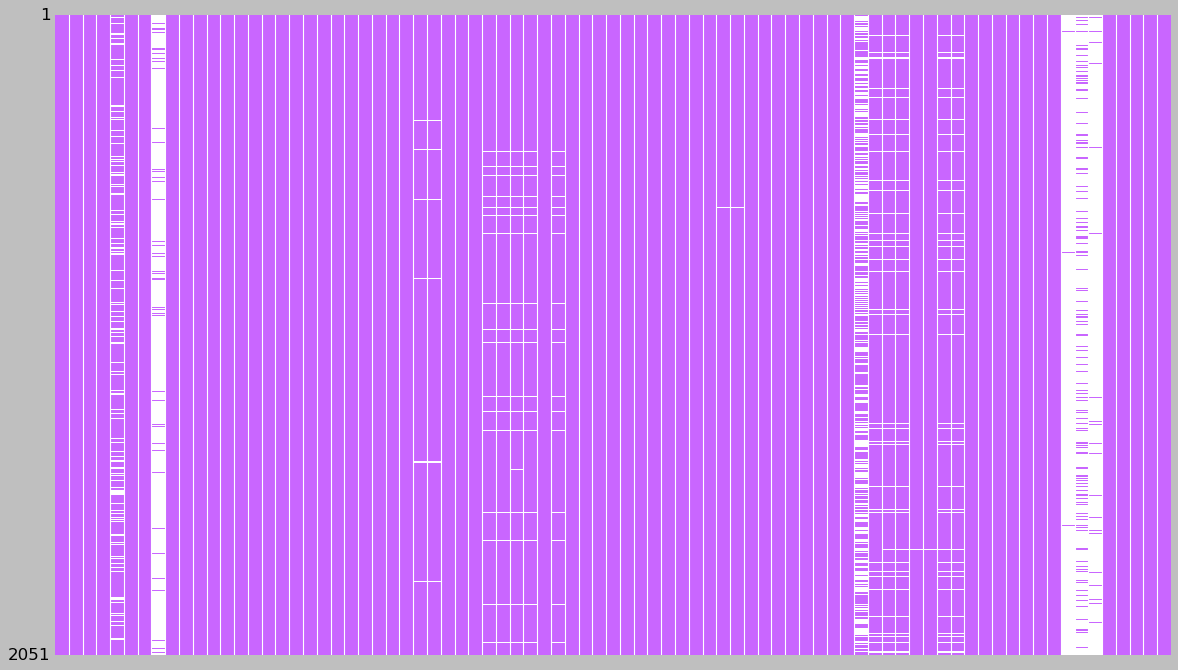

In [258]:
# To visualize the missed values across the train DataFrame. 
# The white parts indicate the missed values within the column
missingno.matrix(df_train, sparkline=False, figsize=(18,10), fontsize=12, color=(0.79, .4, 1.0));
# plt.savefig("Uncleaned train.png") for saving te image

#### Note
> The EDA was performed in the given dataset for a better understanding of dataset variables prior to develop the sale price modeling.

## 2 EDA and Train Data Cleaning 

Store certain drop features that can be used in the analysis in a separate list. This helps to manage the redundant missed values and to looking the statistics summary of the overall dataset. These steps aimed to make the data to be cleaned and ready for modeling.

In [259]:
# This lists use for storing the different data moved from the datafram

drop_cols = []  # list for columns to drop from the train data set


### 2.1 Identify Missed Values

In [260]:
df_train_cl = df_train.copy(deep=True) # to keep the original train data with coping.
df_train_cl.shape

(2051, 81)

In [261]:
# Take a look at the null values in each columns of the df_train

df_train_cl.isnull().sum().sort_values(ascending=False).head(30)

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Fireplace Qu      1000
Lot Frontage       330
Garage Finish      114
Garage Qual        114
Garage Yr Blt      114
Garage Cond        114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
BsmtFin Type 1      55
Bsmt Cond           55
Bsmt Qual           55
Mas Vnr Area        22
Mas Vnr Type        22
Bsmt Half Bath       2
Bsmt Full Bath       2
Garage Area          1
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 2         1
BsmtFin SF 1         1
Garage Cars          1
Mo Sold              0
Sale Type            0
Full Bath            0
Half Bath            0
dtype: int64

26 columns have missed values in the train dataframe. A large share of missing values are from the first five features as shown above. The following are some of the typical example:
- _Pool QC_: it may be related to a house with _PoolArea_
- _Misc Feature_: Extra feature does not have detailed information 
- _Alley_: Alley access to the property
- _Fence_: fence type of the property
- _Fireplace Qu_: check correlation with _Fireplaces_ for further processing

In [262]:
# To check statistical values 
df_train_cl.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2051.0,1.474034e+03,8.439808e+02,1.0,753.5,1486.0,2.198000e+03,2930.0
PID,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,535453200.0,9.071801e+08,924152030.0
MS SubClass,2051.0,5.700878e+01,4.282422e+01,20.0,20.0,50.0,7.000000e+01,190.0
Lot Frontage,1721.0,6.905520e+01,2.326065e+01,21.0,58.0,68.0,8.000000e+01,313.0
Lot Area,2051.0,1.006521e+04,6.742489e+03,1300.0,7500.0,9430.0,1.151350e+04,159000.0
Overall Qual,2051.0,6.112140e+00,1.426271e+00,1.0,5.0,6.0,7.000000e+00,10.0
Overall Cond,2051.0,5.562165e+00,1.104497e+00,1.0,5.0,5.0,6.000000e+00,9.0
Year Built,2051.0,1.971709e+03,3.017789e+01,1872.0,1953.5,1974.0,2.001000e+03,2010.0
Year Remod/Add,2051.0,1.984190e+03,2.103625e+01,1950.0,1964.5,1993.0,2.004000e+03,2010.0
Mas Vnr Area,2029.0,9.969591e+01,1.749631e+02,0.0,0.0,0.0,1.610000e+02,1600.0


### 2.2   Imputing  the Train Columns:
   **Pool QC**

In [263]:
# Check PoolQC and PoolArea have any relation in common to have Pool Area values
common_pool= df_train[(df_train['Pool QC'].notnull()) | (df_train['Pool Area'] > 0)][['Pool Area', 'Pool QC']]
common_pool.count()

Pool Area    9
Pool QC      9
dtype: int64

In [264]:
# Check PoolQC has any missed values
df_train_cl['Pool QC'].value_counts()

Gd    4
TA    2
Fa    2
Ex    1
Name: Pool QC, dtype: int64

 since the missed values of the Pool QC are  more than 99% so  it needs to be dropped


Nine observations have only nine nan values in Pool QC and Pool Area. It is good to drop both column since they are full of nan and append to the `drop_cols` list.

In [265]:
# Appending the columns to drop list
drop_cols.append('Pool QC')

**Misc Feature**

In [266]:
# Check the Misc Feature
df_train_cl['Misc Feature'].value_counts()

Shed    56
Gar2     4
Othr     3
Elev     1
TenC     1
Name: Misc Feature, dtype: int64

_Misc Feature_ contain only few values, So it is better to drop and append to the `drop_cols` list.

In [267]:
drop_cols.append('Misc Feature')

**Alley**

In [268]:
# Check alley column to decide to drop
df_train_cl[['Alley']].isna().value_counts()

Alley
True     1911
False     140
dtype: int64

_Alley_ has only 140  meaninful data. It doesn't give good reason to keep this column for modeling.

In [269]:
drop_cols.append('Alley')

**Fence**

In [270]:
# Check Fence column to decide to drop
df_train_cl[['Fence']].isna().value_counts()

Fence
True     1651
False     400
dtype: int64

In [271]:
# The fence values 
df_train_cl['Fence'].value_counts()

MnPrv    227
GdPrv     83
GdWo      80
MnWw      10
Name: Fence, dtype: int64

Around 81% of  _Fence_ values are missed , so it is better drop the column.

In [272]:
drop_cols.append('Fence')

**FireplaceQu**

In [273]:
# Look at the relation of FireplaceQu with Fireplaces to decide to remove either of it
df_train_cl[(df_train_cl['Fireplace Qu'].notnull()) & (df_train_cl['Fireplaces'] != 0)][['Fireplace Qu', 'Fireplaces']].count()

Fireplace Qu    1051
Fireplaces      1051
dtype: int64

In [274]:
#Check its value
df_train_cl['Fireplace Qu'].value_counts()

Gd    523
TA    407
Fa     59
Ex     31
Po     31
Name: Fireplace Qu, dtype: int64

In [275]:
#Check its value
df_train_cl['Fireplaces'].value_counts()

0    1000
1     898
2     146
3       6
4       1
Name: Fireplaces, dtype: int64

In [276]:
#Check its null 
df_train_cl['Fireplaces'].isna().sum()

0

The _Fireplace Qu_ & _Fireplaces_ are related with $1051$ values. so it is better to keep _Fireplaces_ which doesn't have nan value and drop _Fireplace Qu_

In [277]:
# append the 'Fireplace Qu' to the drop_col
drop_cols.append('Fireplace Qu')

**Lot Frontage**

In [278]:
# Check the continuous feature of 'Lot Frontage'
df_train_cl[['Lot Frontage']].describe().T

,count,mean,std,min,25%,50%,75%,max
Lot Frontage,1721.0,69.0552,23.260653,21.0,58.0,68.0,80.0,313.0


Lot Frontage has reasonable stat values and a normal distribution with 330 nan values, so the nan values were replaced by mean to address the missing values.

In [279]:
# Filling the missed values
df_train_cl['Lot Frontage'].fillna(df_train_cl['Lot Frontage'].mean(), inplace=True)

In [280]:
# Check the availability of nan
df_train_cl['Lot Frontage'].isna().sum()

0

In [281]:
# Take a closer look at each features for missing data and dtype
df_train_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     2051 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [282]:
# Check the missed data values assending order
df_train_cl.isnull().sum().sort_values(ascending=False).head(30)

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Fireplace Qu      1000
Garage Finish      114
Garage Yr Blt      114
Garage Qual        114
Garage Cond        114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
Bsmt Cond           55
Bsmt Qual           55
BsmtFin Type 1      55
Mas Vnr Area        22
Mas Vnr Type        22
Bsmt Half Bath       2
Bsmt Full Bath       2
Garage Area          1
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 2         1
BsmtFin SF 1         1
Garage Cars          1
Misc Val             0
Sale Type            0
Full Bath            0
Half Bath            0
Bedroom AbvGr        0
dtype: int64

In [283]:
# Values without nan in 'Garage Yr Blt' and 'Year Built'
df_train_cl['Garage Yr Blt'].notnull().sum(), df_train_cl['Year Built'].notnull().sum()

(1937, 2051)

In [284]:
# Look at the equal values in the two columns
df_train_cl[(df_train_cl['Garage Yr Blt']==df_train_cl['Year Built'])][['Garage Yr Blt','Year Built']].count()

Garage Yr Blt    1564
Year Built       1564
dtype: int64

In [285]:
#Check the mean of the columns
df_train_cl['Garage Yr Blt'].mean(),df_train_cl['Year Built'].mean()

(1978.7077955601446, 1971.7089224768406)

Therefore, the information of _Garage Yr Blt_ is almost the same as _Year Built_ so better to replace the missing value of _Garage Yr Blt_ by _Year Built_

In [286]:
# Funcion to replace the missed values of a column by other column value (partially sourced: https://stackoverflow.com)
def replaceyear(df,aa,vv):
    for i in range (df.shape[0]):
        ##replace only the null values
        if df.loc[i,aa]!= df.loc[i,aa]:
            df.loc[i,aa]=df.loc[i,vv]
        else:
            df.loc[i,aa]=df.loc[i,aa]
    return df

In [287]:
# Update columns missed values in 'Garage Yr Blt' with values from Year built
df_train_cl=replaceyear(df_train_cl,'Garage Yr Blt','Year Built')
df_train_cl['Garage Yr Blt'].isnull().sum()

0

In [288]:
# The shape of the df_train_cl
df_train_cl.shape

(2051, 81)

In [289]:
#Check the list of drop how many columns appended
drop_cols

['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu']

In [290]:
# Append the PID column since the reduce the redundant with Id value for the model
drop_cols.append('PID')
drop_cols

['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu', 'PID']

**Handling missed data and stats summary**

In [291]:
# Removed all the collected list in drop_col from the df_train_cl for feature selection
df_final=df_train_cl.drop(drop_cols, axis=1)
df_final.shape

(2051, 75)

In [292]:
# Check the missed values with Dtype of the selected feature
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 75 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   MS SubClass      2051 non-null   int64  
 2   MS Zoning        2051 non-null   object 
 3   Lot Frontage     2051 non-null   float64
 4   Lot Area         2051 non-null   int64  
 5   Street           2051 non-null   object 
 6   Lot Shape        2051 non-null   object 
 7   Land Contour     2051 non-null   object 
 8   Utilities        2051 non-null   object 
 9   Lot Config       2051 non-null   object 
 10  Land Slope       2051 non-null   object 
 11  Neighborhood     2051 non-null   object 
 12  Condition 1      2051 non-null   object 
 13  Condition 2      2051 non-null   object 
 14  Bldg Type        2051 non-null   object 
 15  House Style      2051 non-null   object 
 16  Overall Qual     2051 non-null   int64  
 17  Overall Cond  

#### Note
> Some features(16 columns) need to be cleaned the missed values to accomplished the cleaning of the features.

In [293]:
# Check the data of train dataframe partially cleaned from missed values
df_final.head()

,Id,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,60,RL,69.0552,13517,Pave,IR1,Lvl,AllPub,CulDSac,...,44,0,0,0,0,0,3,2010,WD,130500
1,544,60,RL,43.0000,11492,Pave,IR1,Lvl,AllPub,CulDSac,...,74,0,0,0,0,0,4,2009,WD,220000
2,153,20,RL,68.0000,7922,Pave,Reg,Lvl,AllPub,Inside,...,52,0,0,0,0,0,1,2010,WD,109000
3,318,60,RL,73.0000,9802,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,4,2010,WD,174000
4,255,50,RL,82.0000,14235,Pave,IR1,Lvl,AllPub,Inside,...,59,0,0,0,0,0,3,2010,WD,138500


### 2.3 Examine Numeric Features

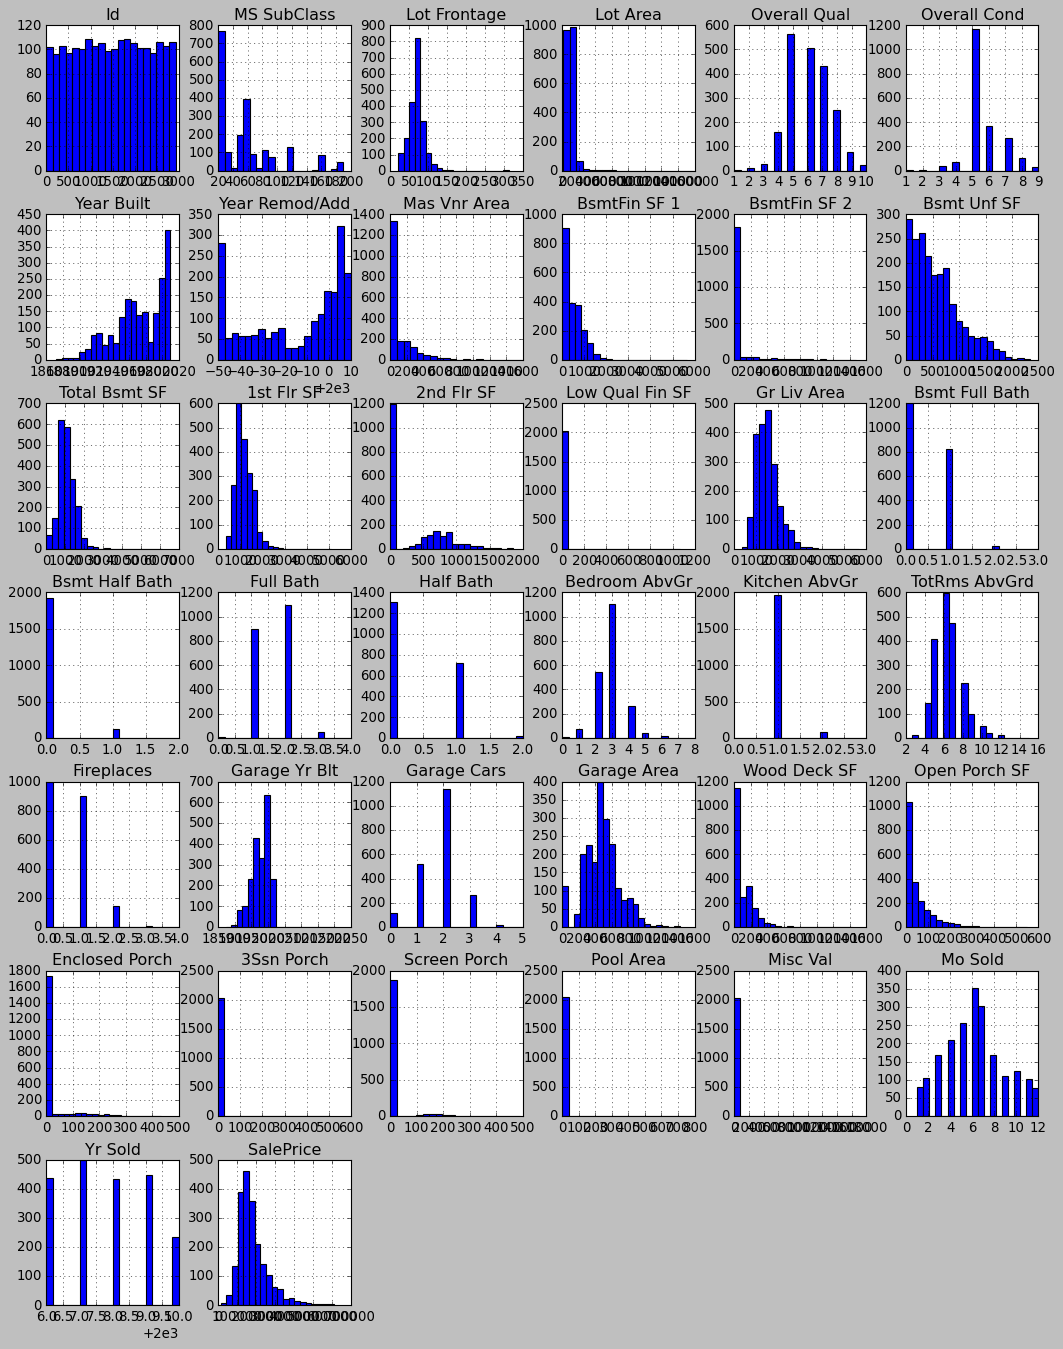

In [294]:
# Plot histograms for the numerical data for further preprocessing specifc numeric column
df_final.select_dtypes(['int64', 'float']).hist(figsize=(16, 20), bins=20, color='blue');
# plt.savefig("Numeric train.png")

<AxesSubplot:>

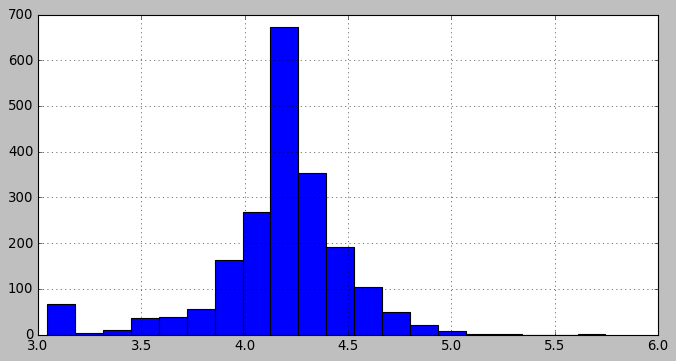

In [295]:
# Examining the individual "Numeric features
lef = np.log(df_final['Lot Frontage'])
lef.hist(figsize=(10, 5), bins=20, color='blue')

<AxesSubplot:>

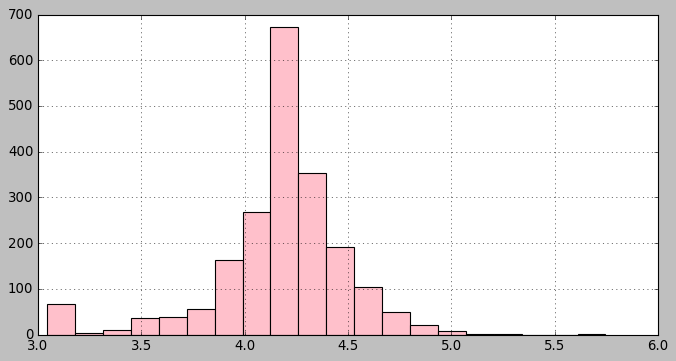

In [296]:
# Examining the individual numeric features to see the distribution
lef = np.log(df_final['Lot Frontage'])
lef.hist(figsize=(10, 5), bins=20, color='pink')

<AxesSubplot:>

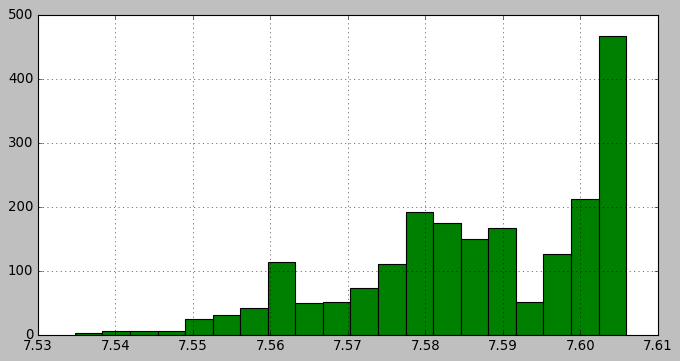

In [297]:
 # Examining the individual numeric features to see the distribution
lef = np.log(df_final['Year Built'])
lef.hist(figsize=(10, 5), bins=20, color='green')

The following new info can be extracted about the nature of some features:

- _Overall Qual & Overall Cond_: discrete rating data
- _SalePrice_: follows a normal distribution with slight positive skew
- _Kitchen AbvGr_,_Low Qual Fin SF_,_3Ssn Porch_,_pool Area_,_Misc Val_: can be dropped as most of the properties have same values
- _Bedroom AbvGr_: can also be dropped because it is already included in the _TotRms AbvGrd_

In [298]:
# Selected features 
df_final_se = df_train.drop(drop_cols, axis=1)
df_final_se.shape

(2051, 75)

In [299]:
# The selected features for modeling from the train data
df_final_se.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 75 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   MS SubClass      2051 non-null   int64  
 2   MS Zoning        2051 non-null   object 
 3   Lot Frontage     1721 non-null   float64
 4   Lot Area         2051 non-null   int64  
 5   Street           2051 non-null   object 
 6   Lot Shape        2051 non-null   object 
 7   Land Contour     2051 non-null   object 
 8   Utilities        2051 non-null   object 
 9   Lot Config       2051 non-null   object 
 10  Land Slope       2051 non-null   object 
 11  Neighborhood     2051 non-null   object 
 12  Condition 1      2051 non-null   object 
 13  Condition 2      2051 non-null   object 
 14  Bldg Type        2051 non-null   object 
 15  House Style      2051 non-null   object 
 16  Overall Qual     2051 non-null   int64  
 17  Overall Cond  

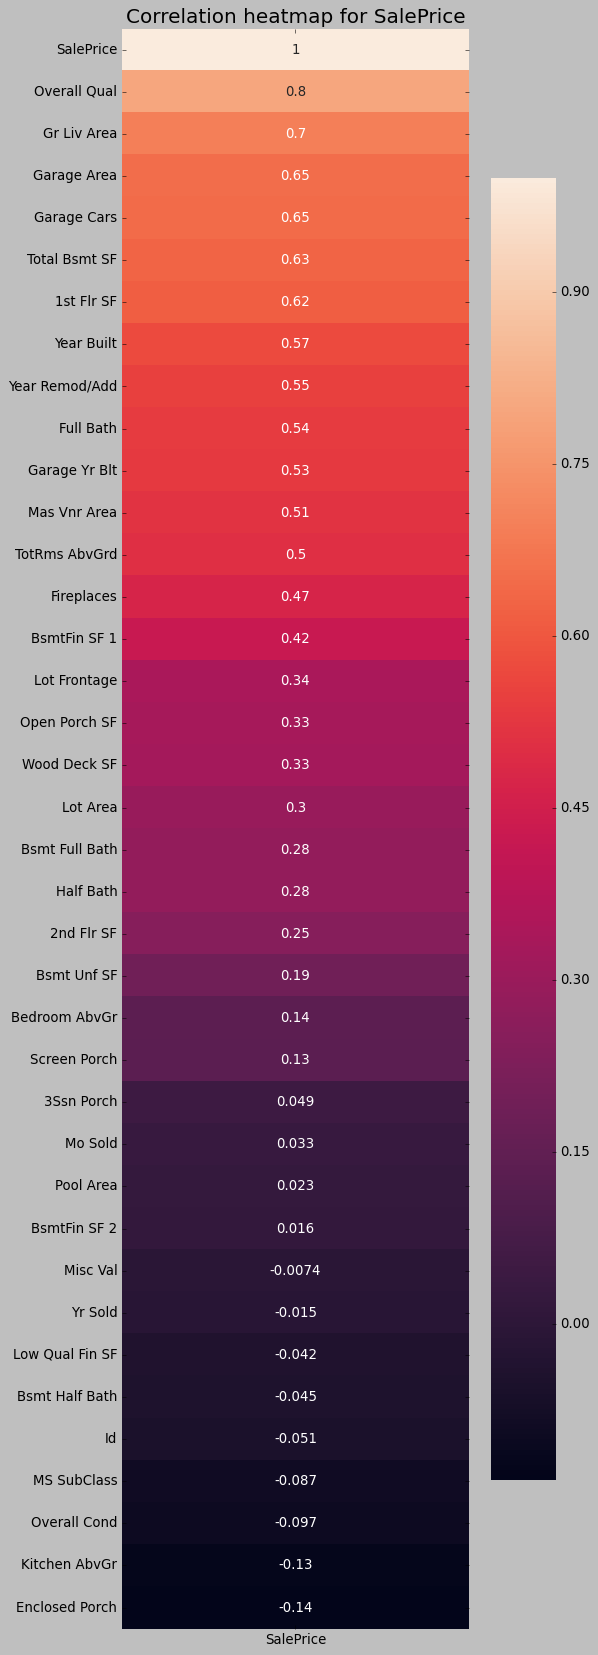

In [300]:
# Plot a heatmap for numerical features that affect SalePrice
plt.figure(figsize=(7, 25))
plt.title('Correlation heatmap for SalePrice', fontdict={'fontsize':18})
sns.heatmap(df_final_se.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False), annot=True);

Overall Cond_ and Enclosed porch: do not have a strong correlation it is good to drop them.

#### Note
> The selected features have some missed values. These features need to be filled with mean or mode of the values.

In [301]:
# Create a function to perform filling (code partially taken: https://www.codegrepper.com)
def get_clean(df, nan_to_mode_cols, nan_to_mean_cols):
    
    # Replace NaN to mode
    for col in nan_to_mode_cols:
        
        df[col].fillna(df[col].mode()[0], inplace=True)
    
    # Replace NaN to mean
    for col in (nan_to_mean_cols):
        df[col].fillna(df[col].mean(), inplace=True)
    return df

In [302]:
# Separate numberic feature 
numerics = ['int64', 'float64']
numberic_feature = df_final_se.select_dtypes(include=numerics).drop (['Id','SalePrice'],axis=1).columns.tolist()
numberic_feature

['MS SubClass',
 'Lot Frontage',
 'Lot Area',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Yr Blt',
 'Garage Cars',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Misc Val',
 'Mo Sold',
 'Yr Sold']

In [303]:
# List of common catagorcal columns in the cleaded train df.
cata_features = df_final_se.select_dtypes(include=['object']).columns.tolist()
cata_features

['MS Zoning',
 'Street',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Heating',
 'Heating QC',
 'Central Air',
 'Electrical',
 'Kitchen Qual',
 'Functional',
 'Garage Type',
 'Garage Finish',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive',
 'Sale Type']

In [304]:
# Use the function to replaced the missed values
df_clean=get_clean(df_final_se, cata_features, numberic_feature)
df_clean.shape

(2051, 75)

In [305]:
df_clean.describe()

,Id,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,442.300488,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,42.824223,21.306357,6742.488909,1.426271,1.104497,30.177889,21.036250,174.021770,461.091621,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,20.000000,60.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,50.000000,69.055200,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,70.000000,78.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,159.000000,733.500000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [306]:
# Removing outliers based on outlier calculation
df_clean['Lot Area']= df_clean['Lot Area'].apply(lambda x:x if x<31000 else 31000)
df_clean['Gr Liv Area']= df_clean['Gr Liv Area'].apply(lambda x:x if x<3000 else 3000)
df_clean['Total Bsmt SF']= df_clean['Total Bsmt SF'].apply(lambda x:x if x<3000 else 3000)
df_clean['BsmtFin SF 1']= df_clean['Total Bsmt SF'].apply(lambda x:x if x<2000 else 2000)

In [307]:
df_clean.describe()

,Id,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2051.000000,2051.000000,2051.00000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.00000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,57.008776,69.055200,9800.52901,6.112140,5.562165,1971.708922,1984.190151,99.695909,1048.38761,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,42.824223,21.306357,4394.12998,1.426271,1.104497,30.177889,21.036250,174.021770,408.58917,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,20.000000,21.000000,1300.00000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,20.000000,60.000000,7500.00000,5.000000,5.000000,1953.500000,1964.500000,0.000000,793.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,50.000000,69.055200,9430.00000,6.000000,5.000000,1974.000000,1993.000000,0.000000,995.00000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,70.000000,78.000000,11513.50000,7.000000,6.000000,2001.000000,2004.000000,159.000000,1318.50000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,190.000000,313.000000,31000.00000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2000.00000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [308]:
#Now the cleaning accomplished for train data
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 75 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   MS SubClass      2051 non-null   int64  
 2   MS Zoning        2051 non-null   object 
 3   Lot Frontage     2051 non-null   float64
 4   Lot Area         2051 non-null   int64  
 5   Street           2051 non-null   object 
 6   Lot Shape        2051 non-null   object 
 7   Land Contour     2051 non-null   object 
 8   Utilities        2051 non-null   object 
 9   Lot Config       2051 non-null   object 
 10  Land Slope       2051 non-null   object 
 11  Neighborhood     2051 non-null   object 
 12  Condition 1      2051 non-null   object 
 13  Condition 2      2051 non-null   object 
 14  Bldg Type        2051 non-null   object 
 15  House Style      2051 non-null   object 
 16  Overall Qual     2051 non-null   int64  
 17  Overall Cond  

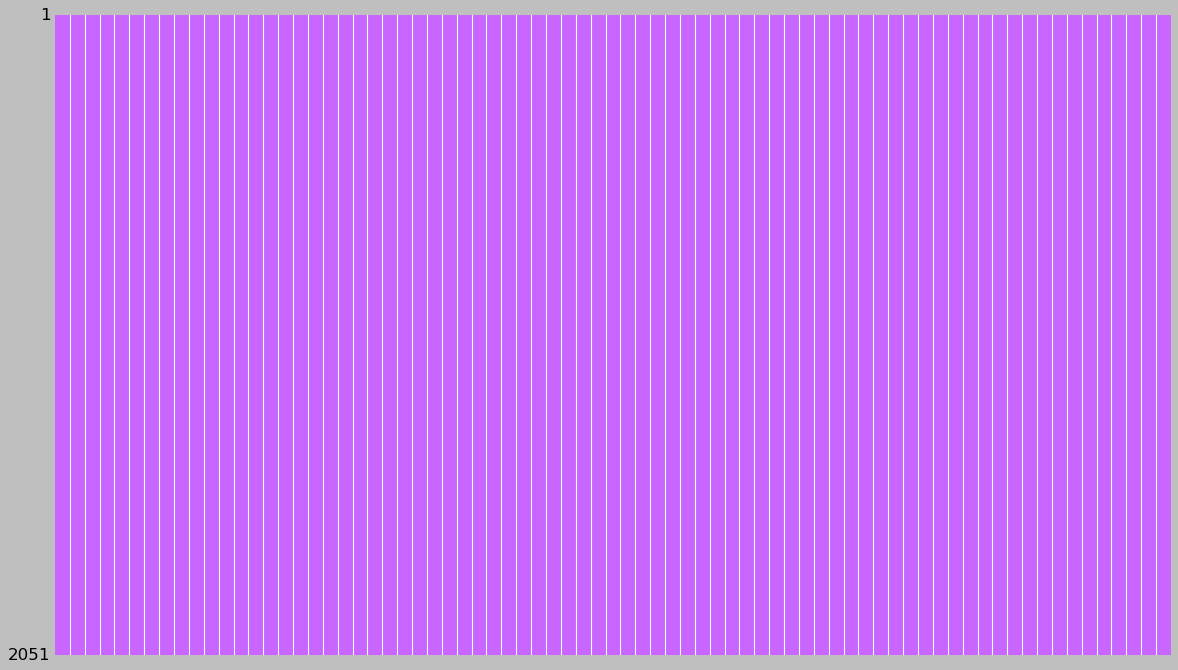

In [309]:
# To visualize the missed values across the numberic columns in the train DataFrame. 
# There is no any null data within the column
missingno.matrix(df_clean, sparkline=False, figsize=(18,10), fontsize=12, color=(0.79, .4, 1.0));
# plt.savefig("Cleaned train.png") for saving

### 2.4 Data Type Validation
Here all the numeric data types were investigated from the train dataframe and the missed values were filled with proper values. The categorical features were dummified to make them suitable for modeling.  

### Perpare the data for modeling

In [310]:
# numerical train features
X_train_num = df_clean[numberic_feature]
X_train_num.shape

(2051, 36)

In [311]:
# scale features in the training.
features = X_train_num
ss = StandardScaler().fit(features.values)
features = ss.transform(features.values)
X_train_num= features

In [312]:
# Conver to DataFrame
X_train_num_sc=pd.DataFrame(X_train_num)
X_train_num_sc.columns=numberic_feature
X_train_num_sc

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
0,0.069866,0.000000,0.845987,-0.078644,2.207728,0.142227,0.989479,1.088084,-0.791667,-0.290801,...,0.006154,-0.730121,-0.053301,-0.377264,-0.102738,-0.287856,-0.06348,-0.089968,-1.173402,1.695731
1,0.069866,-1.223182,0.385033,0.622656,-0.509102,0.805126,0.609090,0.185678,-0.331435,-0.290801,...,0.395351,-0.730121,0.396266,-0.377264,-0.102738,-0.287856,-0.06348,-0.089968,-0.808979,0.933358
2,-0.864413,-0.049537,-0.427613,-0.779944,1.302118,-0.620106,1.084576,-0.573033,0.021084,-0.290801,...,-1.054870,-0.730121,0.066584,-0.377264,-0.102738,-0.287856,-0.06348,-0.089968,-1.902247,1.695731
3,0.069866,0.185192,0.000335,-0.779944,-0.509102,1.136575,1.084576,-0.573033,-1.626449,-0.290801,...,-0.341343,0.047980,-0.712665,-0.377264,-0.102738,-0.287856,-0.06348,-0.089968,-0.808979,1.695731
4,-0.163704,0.607704,1.009427,-0.078644,2.207728,-2.376787,0.418896,-0.573033,-0.911621,-0.290801,...,0.047854,-0.730121,0.171483,-0.377264,-0.102738,-0.287856,-0.06348,-0.089968,-1.173402,1.695731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,-0.864413,0.466867,0.375244,1.323956,-0.509102,1.169720,1.084576,-0.573033,2.045615,-0.290801,...,0.214653,-0.730121,3.423346,-0.377264,-0.102738,-0.287856,-0.06348,-0.089968,-1.902247,0.170986
2047,-0.630843,0.000000,0.578520,-1.481245,-0.509102,-1.050990,-1.625693,-0.573033,-0.458733,-0.290801,...,0.302685,0.499278,-0.712665,-0.377264,-0.102738,-0.287856,-0.06348,-0.089968,-1.173402,0.933358
2048,-0.163704,-0.565941,-0.510471,-0.078644,0.396508,-1.448729,-1.625693,-0.573033,-0.373051,-0.290801,...,-0.610073,-0.730121,-0.712665,-0.377264,-0.102738,-0.287856,-0.06348,-0.089968,-1.173402,0.933358
2049,-0.864413,0.513812,0.136459,-1.481245,-0.509102,-0.520671,-1.340402,-0.573033,0.371154,4.256847,...,-0.832472,-0.730121,2.119604,1.962679,-0.102738,-0.287856,-0.06348,-0.089968,1.741979,0.933358


In [313]:
#Shape of X_train
X_train_num_sc.shape

(2051, 36)

In [314]:
# Numeric features
X_train_num_sc.describe()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
count,2.051000e+03,2.051000e+03,2.051000e+03,2.051000e+03,2.051000e+03,2.051000e+03,2.051000e+03,2.051000e+03,2.051000e+03,2.051000e+03,...,2.051000e+03,2.051000e+03,2.051000e+03,2.051000e+03,2.051000e+03,2.051000e+03,2.051000e+03,2.051000e+03,2.051000e+03,2.051000e+03
mean,-4.058052e-16,-1.709992e-16,-1.867513e-17,2.439676e-16,2.265916e-16,-1.089545e-15,3.856875e-15,-3.269501e-16,1.871573e-17,-2.249947e-16,...,2.307597e-16,1.173556e-16,7.206165e-17,1.604708e-16,-3.377898e-16,4.288785e-16,-2.827929e-16,-2.343458e-16,-6.988965e-17,7.953679e-14
std,1.000244e+00,1.000244e+00,1.000244e+00,1.000244e+00,1.000244e+00,1.000244e+00,1.000244e+00,1.000244e+00,1.000244e+00,1.000244e+00,...,1.000244e+00,1.000244e+00,1.000244e+00,1.000244e+00,1.000244e+00,1.000244e+00,1.000244e+00,1.000244e+00,1.000244e+00,1.000244e+00
min,-8.644127e-01,-2.255990e+00,-1.934991e+00,-3.585145e+00,-4.131543e+00,-3.304845e+00,-1.625693e+00,-5.730330e-01,-2.566498e+00,-2.908010e-01,...,-2.194659e+00,-7.301210e-01,-7.126647e-01,-3.772643e-01,-1.027384e-01,-2.878556e-01,-6.348005e-02,-8.996769e-02,-1.902247e+00,-1.353760e+00
25%,-8.644127e-01,-4.251036e-01,-5.236736e-01,-7.799443e-01,-5.091021e-01,-6.035334e-01,-9.362388e-01,-5.730330e-01,-6.251999e-01,-2.908010e-01,...,-7.166392e-01,-7.301210e-01,-7.126647e-01,-3.772643e-01,-1.027384e-01,-2.878556e-01,-6.348005e-02,-8.996769e-02,-8.089792e-01,-5.913872e-01
50%,-1.637037e-01,0.000000e+00,-8.434420e-02,-7.864410e-02,-5.091021e-01,7.593759e-02,4.188958e-01,-5.730330e-01,-1.306952e-01,-2.908010e-01,...,2.932083e-02,-7.301210e-01,-3.080549e-01,-3.772643e-01,-1.027384e-01,-2.878556e-01,-6.348005e-02,-8.996769e-02,-8.013389e-02,1.709856e-01
75%,3.034356e-01,4.199207e-01,3.899267e-01,6.226561e-01,3.965080e-01,9.708506e-01,9.419302e-01,3.408686e-01,6.612468e-01,-2.908010e-01,...,4.741169e-01,5.770882e-01,3.363236e-01,-3.772643e-01,-1.027384e-01,-2.878556e-01,-6.348005e-02,-8.996769e-02,6.487114e-01,9.333585e-01
max,3.106271e+00,1.145218e+01,4.825674e+00,2.726557e+00,3.113338e+00,1.269155e+00,1.227222e+00,8.623461e+00,2.329588e+00,8.646842e+00,...,4.375349e+00,1.035003e+01,7.484429e+00,6.843131e+00,2.003724e+01,8.254651e+00,2.111547e+01,2.956529e+01,2.106402e+00,1.695731e+00


In [315]:
# Function to dummies catagorical columns
def getdummy(df_catagor):
    df=pd.get_dummies(df_catagor,columns=cata_features,drop_first=True)
    return df

In [316]:
# Check catagorical features 
X_train_cat=df_clean[cata_features]
X_train_cat.shape

(2051, 37)

In [317]:
# Dummify and shape of the catagorical columns of the cleaned train df
X_train_cat_dummy= getdummy(X_train_cat)
X_train_cat_dummy.shape

(2051, 196)

In [318]:
X_train_cat_dummy.head()

,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,...,Paved Drive_P,Paved Drive_Y,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,0,0,0,0,1,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,1
3,0,0,0,0,1,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [319]:
# concate num and catagorical features
X_train_model=pd.concat([X_train_num_sc, X_train_cat_dummy],axis = 1)
X_train_model.shape

(2051, 232)

In [320]:
# y_train value
y_train_model=df_clean['SalePrice']
y_train_model.shape

(2051,)

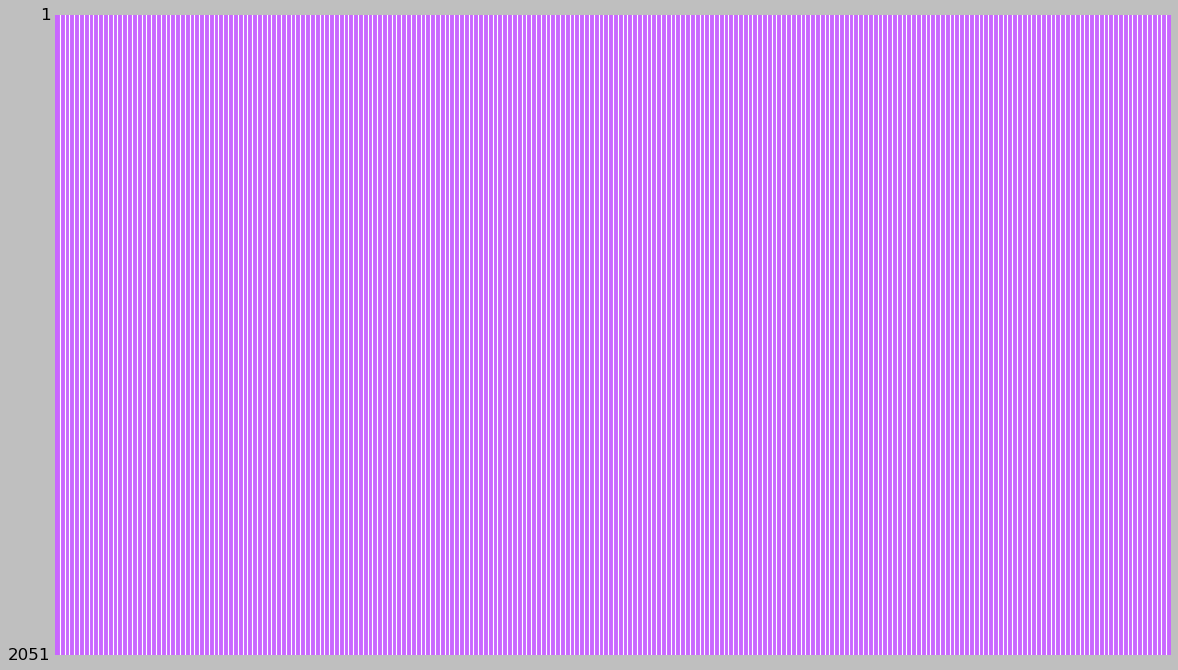

In [321]:
# To visualize the dummfied and cleaned trained data ready for modeling. 
# There is no any null data within the columns
missingno.matrix(X_train_model, sparkline=False, figsize=(18,10), fontsize=12, color=(0.79, .4, 1.0));
# plt.savefig("cleaned train.png")

#### Note
> Filled every null value in the data set and making ready for modeling.

<function matplotlib.pyplot.show(close=None, block=None)>

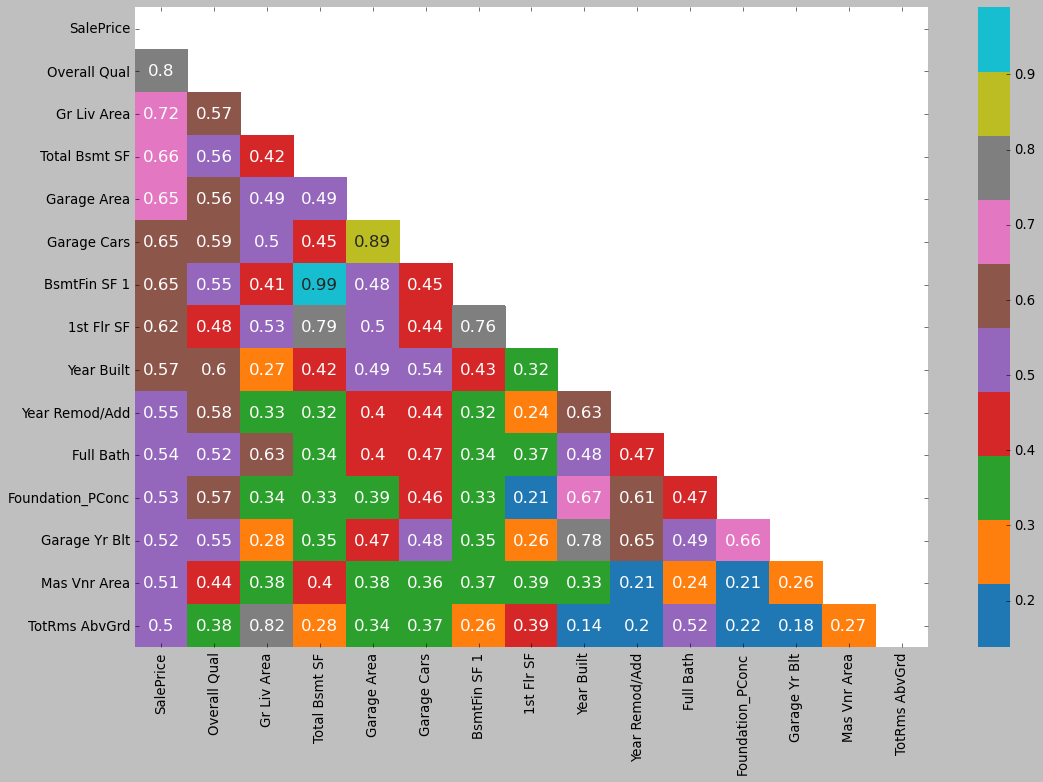

In [322]:
# Plot to see the corelation between selected features with sale price.
train_cor=pd.concat([X_train_model,y_train_model],axis=1)
k = 15
cols = train_cor.corr().nlargest(k, 'SalePrice')['SalePrice'].index
train_cor[cols].corr()
plt.figure(figsize=(16,10))
mask = np.zeros_like(train_cor[cols].corr());
mask[np.triu_indices_from(mask)] = True; # hide the upper triangle of the graph
sns.heatmap(train_cor[cols].corr(), annot=True, mask=mask, annot_kws={'size': 15}, cmap="tab10")
plt.show
# plt.savefig("Correlation.png")

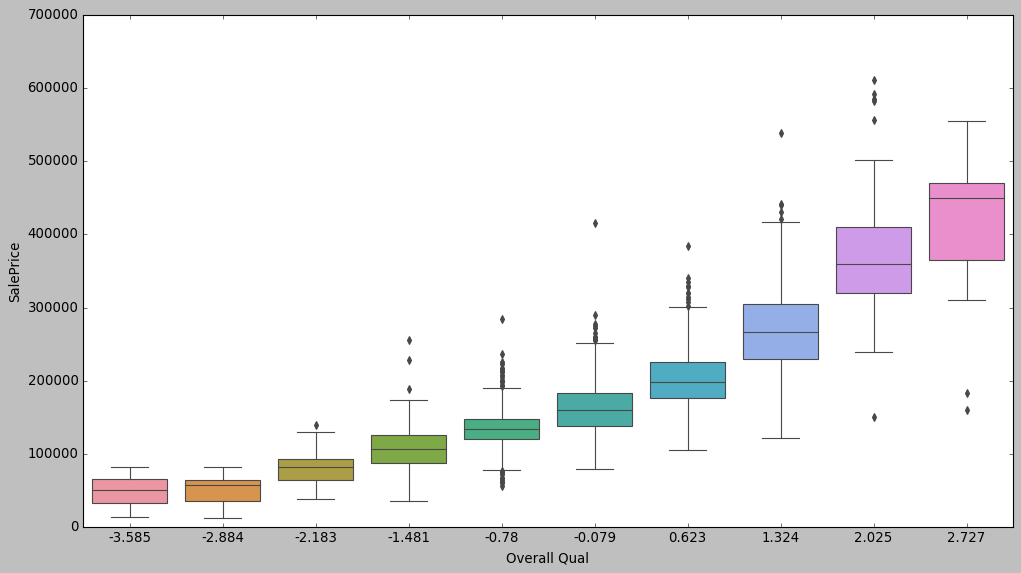

In [323]:
# The highest correlated feature of overall quality follows higher saleprice 
plt.figure(figsize =(15, 8))
#plt.style.use('White_background')
fig = sns.boxplot(x= np.around(train_cor['Overall Qual'], 3), y="SalePrice", data = train_cor)
# plt.savefig("Overall Quality.png")

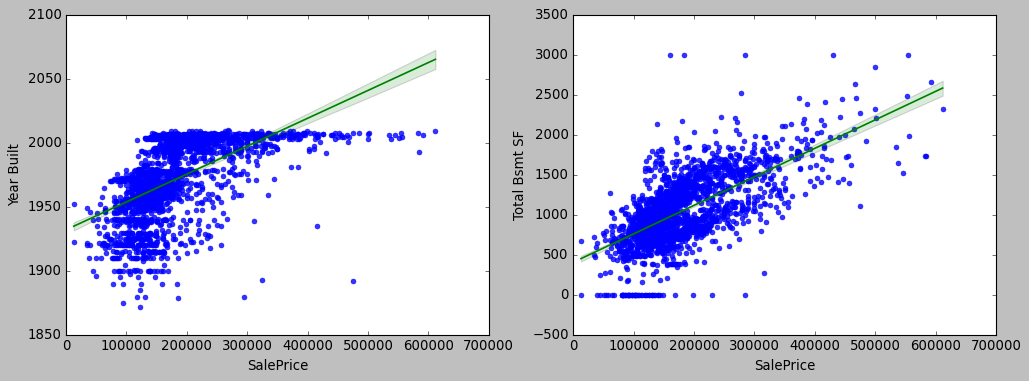

In [324]:
# Ground living area and garage_cars are typical examples of positively correlated to saleprice
fig, axs = plt.subplots(ncols=2, figsize = (15,5))
sns.regplot(x=(df_clean['SalePrice']), y = df_clean['Year Built'], line_kws={"color": "green"}, ax=axs[0])
sns.regplot(x=(df_clean['SalePrice']), y = df_clean['Total Bsmt SF'], line_kws={"color": "green"}, ax=axs[1])
plt.show();
# plt.savefig("year built and basement surface.png")

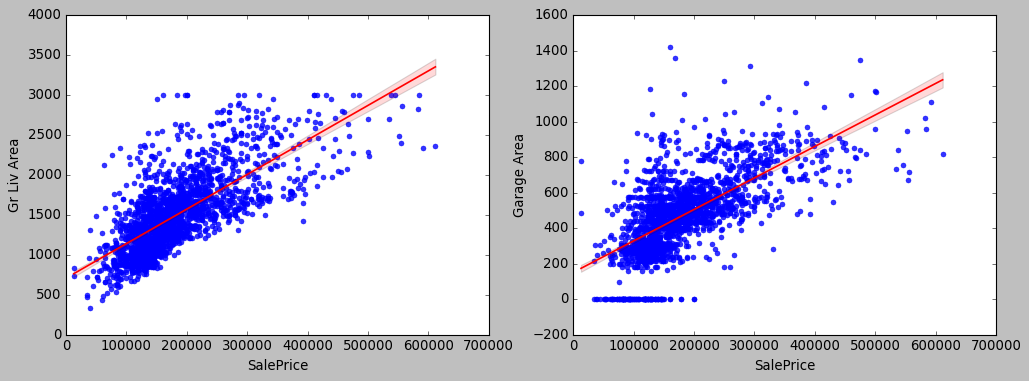

In [325]:
# Ground living area and garage_cars are typical examples of positively correlated to saleprice
fig, axs = plt.subplots(ncols=2, figsize = (15,5))
sns.regplot(x=(df_clean['SalePrice']), y = df_clean['Gr Liv Area'], line_kws={"color": "red"}, ax=axs[0])
sns.regplot(x=(df_clean['SalePrice']), y = df_clean['Garage Area'], line_kws={"color": "red"}, ax=axs[1])
plt.show();
# plt.savefig("carage and ground living area.png")

## 3 Loading and Preprocessing Test Data

In [326]:
# Load the test dataset
df_test = pd.read_csv('./datasets/test.csv')
df_test.shape

(878, 80)

In [327]:
#look up the Dtype and available null values of the given test DataFrame.
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               878 non-null    int64  
 1   PID              878 non-null    int64  
 2   MS SubClass      878 non-null    int64  
 3   MS Zoning        878 non-null    object 
 4   Lot Frontage     718 non-null    float64
 5   Lot Area         878 non-null    int64  
 6   Street           878 non-null    object 
 7   Alley            58 non-null     object 
 8   Lot Shape        878 non-null    object 
 9   Land Contour     878 non-null    object 
 10  Utilities        878 non-null    object 
 11  Lot Config       878 non-null    object 
 12  Land Slope       878 non-null    object 
 13  Neighborhood     878 non-null    object 
 14  Condition 1      878 non-null    object 
 15  Condition 2      878 non-null    object 
 16  Bldg Type        878 non-null    object 
 17  House Style     

#### Note
> There are some null values in the test data.

In [328]:
# Test data before cleaning 
df_test.isnull().sum().sort_values(ascending=False).head(20)

Pool QC           874
Misc Feature      837
Alley             820
Fence             706
Fireplace Qu      422
Lot Frontage      160
Garage Yr Blt      45
Garage Finish      45
Garage Qual        45
Garage Cond        45
Garage Type        44
BsmtFin Type 1     25
Bsmt Qual          25
Bsmt Cond          25
Bsmt Exposure      25
BsmtFin Type 2     25
Electrical          1
Mas Vnr Type        1
Mas Vnr Area        1
Kitchen AbvGr       0
dtype: int64

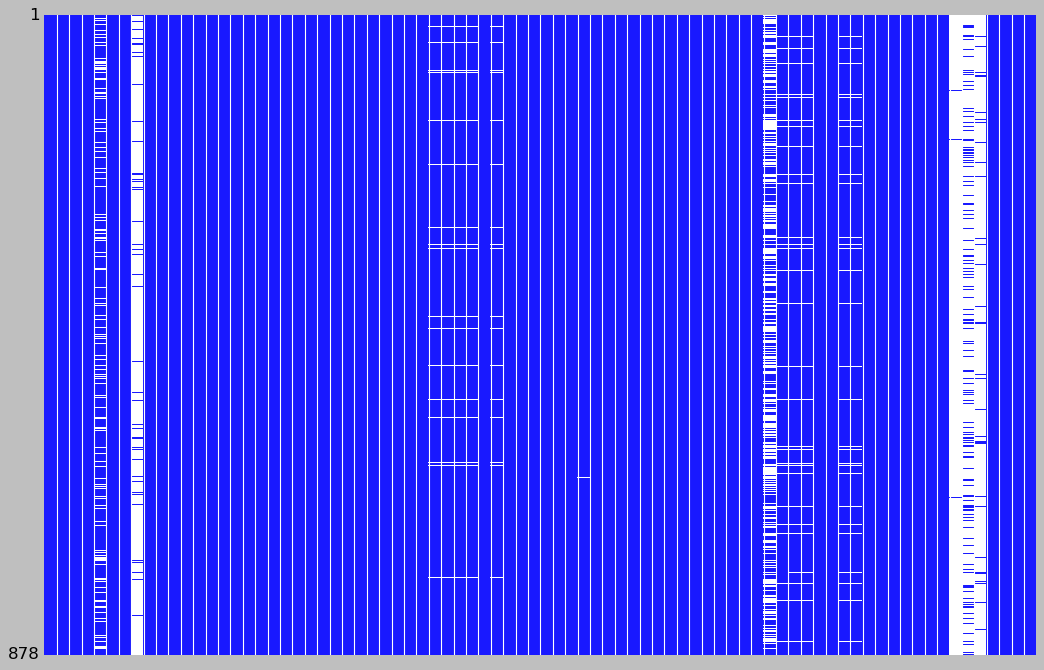

In [329]:
# To visualize the dummfied and cleaned trained data ready for modeling. 
# The white parts indicates the null data within the columns
missingno.matrix(df_test, sparkline=False, figsize=(16,10), fontsize=12, color=(0.1, .1, 1.0));
# plt.savefig("uncleaned test.png")

In [330]:
# Selected common features of the train and test except SalePrice
#df_test_se= df_test[df_clean.drop('SalePrice',axis=1).columns]
df_test.shape

(878, 80)

In [331]:
#look up the Dtype and available null values of selected test DataFrame.
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               878 non-null    int64  
 1   PID              878 non-null    int64  
 2   MS SubClass      878 non-null    int64  
 3   MS Zoning        878 non-null    object 
 4   Lot Frontage     718 non-null    float64
 5   Lot Area         878 non-null    int64  
 6   Street           878 non-null    object 
 7   Alley            58 non-null     object 
 8   Lot Shape        878 non-null    object 
 9   Land Contour     878 non-null    object 
 10  Utilities        878 non-null    object 
 11  Lot Config       878 non-null    object 
 12  Land Slope       878 non-null    object 
 13  Neighborhood     878 non-null    object 
 14  Condition 1      878 non-null    object 
 15  Condition 2      878 non-null    object 
 16  Bldg Type        878 non-null    object 
 17  House Style     

In [332]:
# Selecting the numeric features of test data
numerics = ['int64', 'float64']
numberic_feature_test = df_test.select_dtypes(include=numerics).drop (['Id'],axis=1).columns.tolist()
numberic_feature_test

['PID',
 'MS SubClass',
 'Lot Frontage',
 'Lot Area',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Yr Blt',
 'Garage Cars',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Misc Val',
 'Mo Sold',
 'Yr Sold']

In [333]:
# List of common catagorcal columns in the cleaded train df.
cata_features_test = df_test.select_dtypes(include=['object']).columns.tolist()
cata_features_test

['MS Zoning',
 'Street',
 'Alley',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Heating',
 'Heating QC',
 'Central Air',
 'Electrical',
 'Kitchen Qual',
 'Functional',
 'Fireplace Qu',
 'Garage Type',
 'Garage Finish',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive',
 'Pool QC',
 'Fence',
 'Misc Feature',
 'Sale Type']

In [334]:
# Replace nan value with mode and mean of the test dataframe 
df_test_clean=get_clean(df_test, cata_features_test, numberic_feature_test) 
df_test_clean

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.000000,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,Ex,MnPrv,Shed,0,4,2006,WD
1,2718,905108090,90,RL,69.545961,9662,Pave,Grvl,IR1,Lvl,...,0,0,0,Ex,MnPrv,Shed,0,8,2006,WD
2,2414,528218130,60,RL,58.000000,17104,Pave,Grvl,IR1,Lvl,...,0,0,0,Ex,MnPrv,Shed,0,9,2006,New
3,1989,902207150,30,RM,60.000000,8520,Pave,Grvl,Reg,Lvl,...,0,0,0,Ex,MnPrv,Shed,0,7,2007,WD
4,625,535105100,20,RL,69.545961,9500,Pave,Grvl,IR1,Lvl,...,0,185,0,Ex,MnPrv,Shed,0,7,2009,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,1662,527377110,60,RL,80.000000,8000,Pave,Grvl,Reg,Lvl,...,0,0,0,Ex,MnPrv,Shed,0,11,2007,WD
874,1234,535126140,60,RL,90.000000,14670,Pave,Grvl,Reg,Lvl,...,0,0,0,Ex,MnPrv,Shed,0,8,2008,WD
875,1373,904100040,20,RL,55.000000,8250,Pave,Grvl,Reg,Lvl,...,0,0,0,Ex,MnPrv,Shed,0,8,2008,WD
876,1672,527425140,20,RL,60.000000,9000,Pave,Grvl,Reg,Lvl,...,0,0,0,Ex,GdWo,Shed,0,5,2007,WD


In [335]:
## catagorize the numeric and catagorical columns
X_test_num=df_test_clean[numberic_feature]
X_test_num.shape

(878, 36)

In [336]:
# scale features in the testing.
features1 = X_test_num
ss = StandardScaler().fit(features1.values)
features1 = ss.transform(features1.values)
X_test_num= features1
X_test_num_sc=pd.DataFrame(X_test_num)
X_test_num_sc.columns=numberic_feature
X_test_num_sc

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
0,3.120753,-0.025672,-0.116539,-0.036625,2.157251,-1.991272,-1.683931,-0.568272,-1.007121,-0.301889,...,-0.142805,-0.771435,0.189742,1.201172,-0.104133,-0.279956,-0.063043,-0.088203,-0.834055,-1.375733
1,0.751722,0.000000,-0.064523,-0.767467,-1.388030,0.214229,-0.362932,-0.568272,-1.007121,-0.301889,...,0.515669,0.632217,-0.690771,-0.328721,-0.104133,-0.279956,-0.063043,-0.088203,0.680527,-1.375733
2,0.041013,-0.542904,0.679902,0.694217,-0.501710,1.168849,1.055919,-0.568272,0.257120,-0.301889,...,-0.208652,0.054243,-0.338566,-0.328721,-0.104133,-0.279956,-0.063043,-0.088203,1.059172,-1.375733
3,-0.669697,-0.448862,-0.178757,-0.767467,0.384611,-1.563339,1.055919,-0.568272,-1.007121,-0.301889,...,0.045330,-0.771435,-0.690771,2.184675,-0.104133,-0.279956,-0.063043,-0.088203,0.301881,-0.622212
4,-0.906600,0.000000,-0.080728,-0.036625,-0.501710,-0.246622,-1.047895,0.752967,0.382631,-0.301889,...,0.205245,-0.771435,0.424545,-0.328721,-0.104133,3.212349,-0.063043,-0.088203,0.301881,0.884829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,0.041013,0.491561,-0.230773,-0.036625,0.384611,0.115475,-0.509710,-0.568272,1.117443,0.555107,...,0.082957,-0.771435,0.718049,-0.328721,-0.104133,-0.279956,-0.063043,-0.088203,1.816463,-0.622212
874,0.041013,0.961772,0.436429,-0.036625,1.270931,-0.147868,0.713438,1.624879,0.305043,-0.301889,...,0.045330,-0.771435,2.684528,-0.328721,-0.104133,-0.279956,-0.063043,-0.088203,0.680527,0.131308
875,-0.906600,-0.683967,-0.205766,-0.767467,-0.501710,-0.082032,-0.803265,-0.568272,-0.436615,2.453941,...,-0.697804,-0.771435,0.233767,-0.328721,-0.104133,-0.279956,-0.063043,-0.088203,0.680527,0.131308
876,-0.906600,-0.448862,-0.130743,-1.498309,0.384611,0.016721,-0.656487,-0.568272,0.398606,-0.301889,...,0.271093,-0.771435,-0.690771,-0.328721,-0.104133,-0.279956,-0.063043,-0.088203,-0.455410,-0.622212


In [337]:
# Catagorical test features
X_test_cat=df_test_clean[cata_features]
# Dummify and shape of the catagorical columns of the cleaned test df
X_test_cat_dummy=getdummy(X_test_cat)
X_test_cat_dummy.shape

(878, 181)

In [338]:
# Concate num and catagorical features
X_test_model=pd.concat([X_test_num_sc,X_test_cat_dummy],axis=1)
X_test_model.shape

(878, 217)

In [339]:
X_test_model.describe()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Paved Drive_Y,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD
count,8.780000e+02,8.780000e+02,8.780000e+02,8.780000e+02,8.780000e+02,8.780000e+02,8.780000e+02,8.780000e+02,8.780000e+02,8.780000e+02,...,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000
mean,-2.706011e-17,-9.219719e-17,5.209703e-17,-8.939951e-17,-2.645315e-16,2.714862e-15,1.164849e-15,-6.600643e-17,-8.990530e-17,4.931515e-17,...,0.899772,0.002278,0.001139,0.010251,0.002278,0.003417,0.088838,0.003417,0.001139,0.859909
std,1.000570e+00,1.000570e+00,1.000570e+00,1.000570e+00,1.000570e+00,1.000570e+00,1.000570e+00,1.000570e+00,1.000570e+00,1.000570e+00,...,0.300475,0.047700,0.033748,0.100782,0.047700,0.058387,0.284672,0.058387,0.033748,0.347279
min,-9.065996e-01,-2.282685e+00,-8.832703e-01,-2.959993e+00,-4.046991e+00,-2.978810e+00,-1.683931e+00,-5.682724e-01,-1.007121e+00,-3.018886e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-9.065996e-01,-4.488618e-01,-3.010693e-01,-7.674672e-01,-5.017098e-01,-5.428834e-01,-8.521910e-01,-5.682724e-01,-1.007121e+00,-3.018886e-01,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,-1.958903e-01,0.000000e+00,-8.612934e-02,-3.662533e-02,-5.017098e-01,4.963934e-02,3.709563e-01,-5.682724e-01,-1.559261e-01,-3.018886e-01,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2.779160e-01,3.975184e-01,1.282355e-01,6.942166e-01,3.846106e-01,9.631119e-01,9.091412e-01,3.504440e-01,6.695959e-01,-3.018886e-01,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,3.120753e+00,5.287715e+00,2.049999e+01,2.886742e+00,3.043572e+00,1.300521e+00,1.251622e+00,6.802855e+00,4.214149e+00,8.245666e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [340]:
# Identify the common columns in  train and test data
common_columns = list(set(X_train_model.columns) & set(X_test_model.columns)) 
common_columns                     

['Mas Vnr Type_Stone',
 'Neighborhood_SWISU',
 'Exter Cond_Fa',
 'Sale Type_ConLD',
 '2nd Flr SF',
 'Neighborhood_BrDale',
 'Land Contour_HLS',
 'Bsmt Qual_Gd',
 'Functional_Mod',
 'BsmtFin Type 2_BLQ',
 'MS Zoning_RL',
 'Electrical_FuseF',
 'Exterior 1st_WdShing',
 'Garage Cond_Fa',
 'Exterior 1st_VinylSd',
 'Exter Cond_TA',
 'Neighborhood_Somerst',
 'Lot Config_CulDSac',
 'Condition 1_RRAn',
 'BsmtFin Type 2_Rec',
 'Neighborhood_Veenker',
 'Bsmt Cond_TA',
 'Neighborhood_NridgHt',
 'Functional_Min1',
 'Foundation_PConc',
 'Neighborhood_Gilbert',
 'BsmtFin Type 1_Unf',
 'Roof Style_Gambrel',
 'Exterior 2nd_Wd Shng',
 'Exterior 2nd_Plywood',
 'BsmtFin SF 2',
 'Bsmt Exposure_Gd',
 'MS Zoning_FV',
 'BsmtFin Type 1_BLQ',
 'Garage Yr Blt',
 'House Style_2Story',
 '3Ssn Porch',
 'Exterior 1st_BrkComm',
 'Fireplaces',
 'Neighborhood_NWAmes',
 'Land Slope_Sev',
 'Bldg Type_2fmCon',
 'Exterior 2nd_AsphShn',
 'Exterior 2nd_CmentBd',
 'Gr Liv Area',
 'Exterior 1st_HdBoard',
 'Neighborhood_NAmes',

In [341]:
X_test_final=pd.concat([X_test_model[common_columns],df_test_clean['Id']],axis=1)
X_test_final.shape

(878, 209)

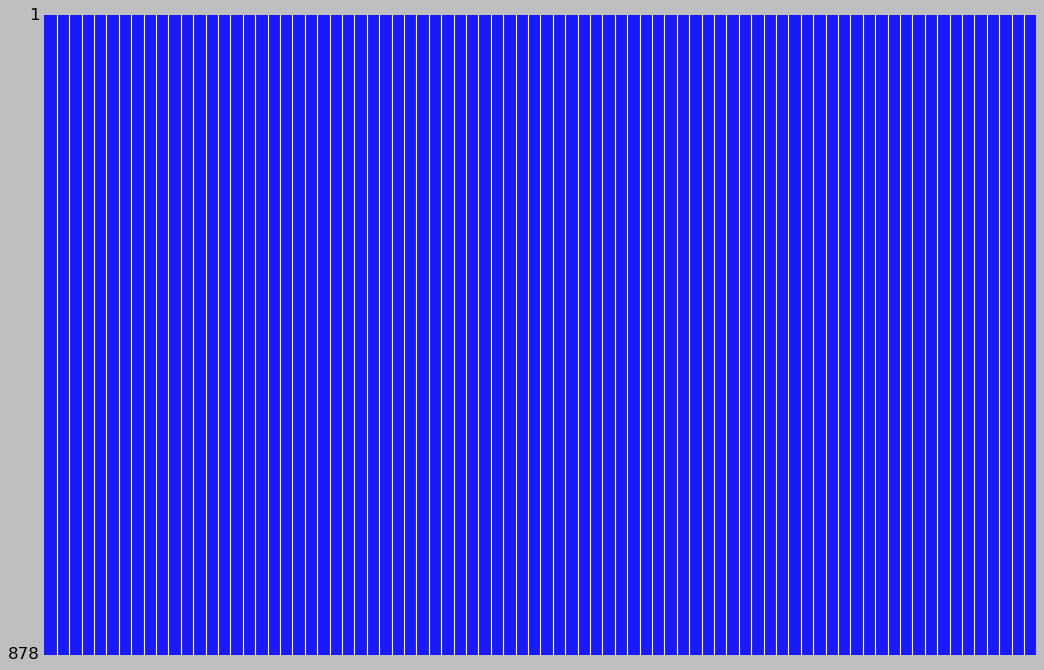

In [342]:
# To visualize the dummfied and cleaned trained data ready for modeling. 
# There is no any  null data within the columns
missingno.matrix(df_test_clean, sparkline=False, figsize=(16,10), fontsize=12, color=(0.1, .1, 1.0));
# plt.savefig("cleaned test.png")

# 4 Model Productions for Predicting the Sale Price

### 4.1 Multiple Linear Regression

In [343]:
## Final with acompletely cleaned and scaled training data
X_train_final= pd.concat([X_train_model[common_columns],df_clean['Id']],axis=1)
X_train_final= X_train_final.drop('Id', axis=1)
y_train_final= df_clean['SalePrice']
X_train_final.shape, y_train_final.shape

((2051, 208), (2051,))

In [344]:
#Split the training data into train and validation sets using train test split
X_train, X_val, y_train, y_val = train_test_split(X_train_final, y_train_final,random_state=25)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1538, 208), (513, 208), (1538,), (513,))

In [345]:
# Fit to the model on training data and evaluate on test data
mlr=LinearRegression().fit(X_train, y_train)
mlr.score(X_train, y_train)
print(f'R2 score on training data: {round(mlr.score(X_train, y_train),3)}')

R2 score on training data: 0.943


In [346]:
#Fit to the model on training data and evaluate on test data
mlr.score(X_val, y_val)
print(f'R2 score on validation data: {round(mlr.score(X_val, y_val),3)}')

R2 score on validation data: 0.863


In [347]:
# The baseline sale price  
y_train_final.mean()

181469.70160897123

In [348]:
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(X_train_final, mlr.coef_))

Intercept:  160903.59582249675
Coefficients:


[('Mas Vnr Type_Stone', 12230.163982501355),
 ('Neighborhood_SWISU', -21074.42777158466),
 ('Exter Cond_Fa', 210.86527270879287),
 ('Sale Type_ConLD', 13577.035051152714),
 ('2nd Flr SF', -68154.33995643795),
 ('Neighborhood_BrDale', -6361.195654948276),
 ('Land Contour_HLS', 8720.794886348034),
 ('Bsmt Qual_Gd', -13879.913181001542),
 ('Functional_Mod', 13133.130593985012),
 ('BsmtFin Type 2_BLQ', -11594.176497814116),
 ('MS Zoning_RL', 14001.183028000156),
 ('Electrical_FuseF', -1117.5152324605024),
 ('Exterior 1st_WdShing', -11341.079561914961),
 ('Garage Cond_Fa', -17853.60833824526),
 ('Exterior 1st_VinylSd', -19455.847674965025),
 ('Exter Cond_TA', 1513.1931406621256),
 ('Neighborhood_Somerst', -2204.505146599122),
 ('Lot Config_CulDSac', 7731.139548602408),
 ('Condition 1_RRAn', 5070.815600671046),
 ('BsmtFin Type 2_Rec', -13040.91847465118),
 ('Neighborhood_Veenker', -10792.03124563721),
 ('Bsmt Cond_TA', 1138.9357063170853),
 ('Neighborhood_NridgHt', 6109.139188856788),
 ('Fun

In [349]:
# Changing the coeffient of the model to Datafram
df_coef=pd.DataFrame(list(zip(X_train_final, mlr.coef_)))
df_coef.columns=['features','coef']
df_coef.head()

,features,coef
0,Mas Vnr Type_Stone,12230.163983
1,Neighborhood_SWISU,-21074.427772
2,Exter Cond_Fa,210.865273
3,Sale Type_ConLD,13577.035051
4,2nd Flr SF,-68154.339956


In [350]:
# Sort the top five coefficients 
df_coef.sort_values(by=['coef'],ascending=True).head(20)

,features,coef
70,MS Zoning_I (all),-3.154223e+17
170,1st Flr SF,-6.852381e+04
4,2nd Flr SF,-6.815434e+04
37,Exterior 1st_BrkComm,-4.922997e+04
187,BsmtFin SF 1,-3.675971e+04
139,Exter Qual_TA,-3.365205e+04
100,Garage Qual_Po,-2.993932e+04
43,Exterior 2nd_CmentBd,-2.884240e+04
193,Exter Qual_Gd,-2.847158e+04
183,Neighborhood_Edwards,-2.832349e+04


R2 of train and validation seems it is overfitting. The base price of the house is 181469 USD in the area. 

### Evaluation the Model

In [351]:
# Calculate RMSE
predictions = mlr.predict(X_val)

print(f'Root Mean Square Error of model on test data is: \
${int(mean_squared_error(y_val, predictions)**0.5)}')

print(f'Root Mean Square Error of model on train data is: \
${int(mean_squared_error(y_train_final, mlr.predict(X_train_final))**0.5)}')

Root Mean Square Error of model on test data is: $30206
Root Mean Square Error of model on train data is: $22146


The RMSE looks good as both figures are quite close to each other 

In [352]:
ols = LinearRegression()
ols.fit(X_train_final, y_train_final)

LinearRegression()

In [353]:
# How does the model score on the training and test data?
print(ols.score(X_train_final, y_train_final))

0.9317429244490457


#### Note
> The OLS values matched exactly with the score obtained by the model fitting. All the model evaluations parameter are on reasonably range except its overfitting and large share of the coefficient in negative range.

### 4.2 Ridge Regression

#### Ridge

In [354]:
# Instantiate and fit the model
r_alphas = np.logspace(0, 5, 100)
ridge = RidgeCV(alphas=r_alphas, scoring='r2', cv=5)
ridge.fit(X_train, y_train)

RidgeCV(alphas=array([1.00000000e+00, 1.12332403e+00, 1.26185688e+00, 1.41747416e+00,
       1.59228279e+00, 1.78864953e+00, 2.00923300e+00, 2.25701972e+00,
       2.53536449e+00, 2.84803587e+00, 3.19926714e+00, 3.59381366e+00,
       4.03701726e+00, 4.53487851e+00, 5.09413801e+00, 5.72236766e+00,
       6.42807312e+00, 7.22080902e+00, 8.11130831e+00, 9.11162756e+00,
       1.02353102e+01, 1.14975700e+0...
       6.89261210e+03, 7.74263683e+03, 8.69749003e+03, 9.77009957e+03,
       1.09749877e+04, 1.23284674e+04, 1.38488637e+04, 1.55567614e+04,
       1.74752840e+04, 1.96304065e+04, 2.20513074e+04, 2.47707636e+04,
       2.78255940e+04, 3.12571585e+04, 3.51119173e+04, 3.94420606e+04,
       4.43062146e+04, 4.97702356e+04, 5.59081018e+04, 6.28029144e+04,
       7.05480231e+04, 7.92482898e+04, 8.90215085e+04, 1.00000000e+05]),
        cv=5, scoring='r2')

In [355]:
# Optimal alpha value
ridge.alpha_

1.0

#### Cross-validate for Ridge Regression

In [356]:
# Instantiate ridge its optimal alpha
ridge_opt = Ridge(alpha = ridge.alpha_)

In [357]:
# Mean cross validation score with best ridge model
round(np.sqrt(-cross_val_score(ridge_opt, X_train, y_train, cv=10, scoring='neg_mean_squared_error').mean()), 3)

22665.325

In [358]:
# Fit the optimal ridge model
ridge_opt.fit(X = X_train, y = y_train)

Ridge()

In [359]:
# Finally, the RidgeCV ued to get the score.
ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))
ridge_scores = cross_val_score(ridge_opt,X_train, y_train, cv=10)
ridge_scores.mean()

0.9149526400618913

In [360]:
# Validation in Ridge score
ridge_opt.score(X_val,y_val)  

0.8735362940327619

#### Note
> The Ridge values of the train and validation test results show great improvement to close to each others. The optimized ridge regression was applied to determine the price for this project.

### 4.3 Lasso Regression

In [361]:
# Instantiate and fit the model and set up a list of Lasso alphas 
lassocv = LassoCV(n_alphas=200)
lassocv.fit(X_train, y_train)

LassoCV(n_alphas=200)

In [362]:
# The optimal lasso value of alpha
lassocv.alpha_

63.31115196399837

####  Cross-Validate for Lasso Regression 

In [363]:
# Instantiate the lasso model  with optimal alpha
lasso_opt = Lasso(alpha=lassocv.alpha_)

In [364]:
# Mean cross validation score with optimal lasso model
np.sqrt(-cross_val_score(lasso_opt, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 917026766.623352, tolerance: 708714997.7004529
  model = cd_fast.enet_coordinate_descent(


22909.91093549598

In [365]:
# Fit the values using Lasso_opt model
lasso_opt.fit(X_train, y_train)

Lasso(alpha=63.31115196399837)

In [366]:
# Fit the values using Lasso_opt model
lasso_opt.fit(X_val, y_val)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 667489770.0272827, tolerance: 342381510.3650035
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=63.31115196399837)

In [367]:
# score train using lasso regression
lasso_scores = cross_val_score(lasso_opt, X_train, y_train, cv=3)
lasso_scores.mean()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 990920526.4886475, tolerance: 606832993.7942688
  model = cd_fast.enet_coordinate_descent(


0.9141307241720961

In [368]:
# score validate using lasso regression
lasso_scores = cross_val_score(lasso_opt, X_val, y_val, cv=3)
lasso_scores.mean()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 859106993.337326, tolerance: 239964947.99335006
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 676878287.5273132, tolerance: 235348896.41222104
  model = cd_fast.enet_coordinate_descent(


0.8892830177812074

#### Note
> The Lasso values of the train and validation test show similar results with little difference. Ridge modeling was selected for the prediction of the price.  

# 5 Prediction

In [369]:
# Prediction of the sale price using the best performing optimized ridge regression 
cc = X_test_final.drop('Id', axis=1)
y_pre=ridge_opt.predict(cc)
print(y_pre)

[170236.61787723 236881.74131248 184620.63642247 144216.30706097
 184681.20866405  72773.28018909 134990.11363602 186424.39345509
 197310.2162305  167505.60677532 171033.84238572 167218.29147194
 191968.0170787  248190.36518432 166987.02004854  59900.15977365
 150111.63219142 131148.85412489 160778.973818   172082.25408629
 174453.85919148 112128.92308834 239131.42112759 134174.93286179
 224341.30863699 121447.32566617 108434.10092632 121818.98785766
 137562.83369396  38279.16514037 111142.54881969  64221.88660362
 257229.12872806 123445.55137519 263936.35981392 186771.7353567
 143723.35594619  59511.79211666  88297.01485147 247408.92212464
 177520.16074754 219404.08116216 151093.99207457 138946.87909094
 193639.01360148  99469.44232272 198390.08045139 119743.59634224
 146458.93894488 104864.15002456 117266.30323299 169413.57695462
 291858.22897277 155724.99766909  87880.81852888 162706.68468589
 169880.49331058 139568.37661126 159308.56109407 200972.77517315
 289461.2680932   98700.43

In [370]:
# Define a function to plot predictions vs actuals

def plot_y_ypred(y, ypred):
    plt.figure(figsize=(10,10))

    plt.scatter(y, ypred, color='blue', s=50, label='Predicted vs. Actual', alpha= 0.5 )

    # Plot assuming the actual y as x (x=y)
    max_valid = np.max(y)
    plt.plot([0, max_valid*1.05], [0, max_valid*1.05], color='red',
            linewidth=3.0, alpha=0.5, label='Perfect model')
    
    # Axis labeling
    plt.xlabel('Actual Sale Price ($)')
    plt.xlim(0,max_valid*1.05)

    plt.ylabel('Predicted Sale Price ($)')
    plt.ylim(0,max_valid*1.05)
    
    plt.title('Plot of predicted values vs. actual values')
    plt.legend() 
    plt.show()

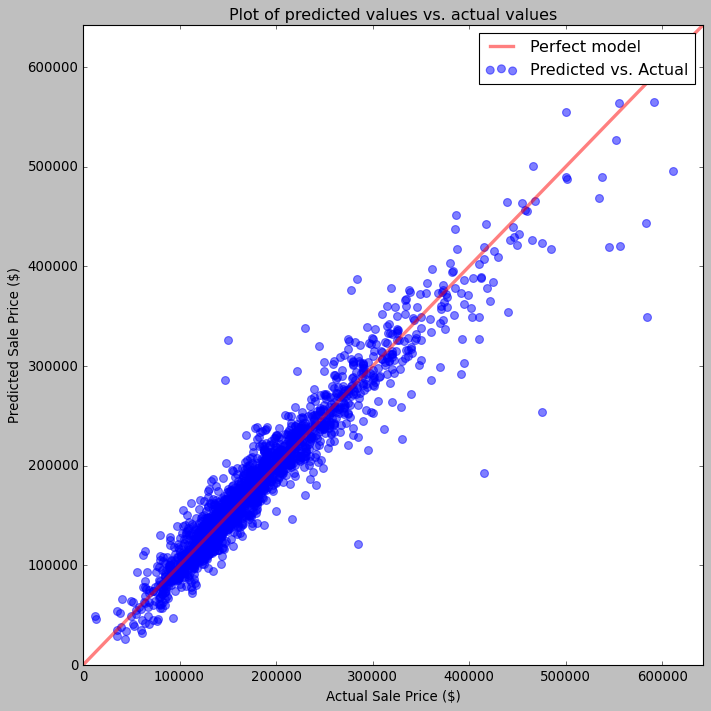

In [371]:
# Plote prediction vs True values
plot_y_ypred(y_train_final, mlr.predict(X_train_final))
 
# plt.savefig("prediction vs True.png")

The figure shows the linear relation of the predicted and actual price except for a few outliers at the top of the fitted line.

In [372]:
# Change the prediction of the sale price to dataframe
yy_test=pd.DataFrame(y_pre)
yy_test.columns=['SalePrice']
yy_test.SalePrice=round(yy_test.SalePrice,3)
yy_test.head()

,SalePrice
0,170236.618
1,236881.741
2,184620.636
3,144216.307
4,184681.209


In [373]:
# Adding Id to the datafram
x_test_id = pd.DataFrame(X_test_final.Id).reset_index(drop=True)
x_test_id.head()

,Id
0,2658
1,2718
2,2414
3,1989
4,625


In [374]:
# Merge the predicted sale price and the Id
y_pred_id = pd.concat([x_test_id,yy_test], axis=1)
y_pred_id.head()

,Id,SalePrice
0,2658,170236.618
1,2718,236881.741
2,2414,184620.636
3,1989,144216.307
4,625,184681.209


In [375]:
# Shape of the predicted values
y_pred_id.shape

(878, 2)

In [376]:
#Saving the pridected values for submition
y_pred_id.to_csv('submission_sub_reg.csv', index=False) 

# 6 Conclusions and Recommendations

<p style = 'text-align:justify:'> 
The project dealt with housing data from the city of Ames, Iowa which consists of the detailed properties for sales in the years 206 to 2010.  The original data contains 81 features including the target, a large share of the data have missing values that are not used by the regression models. Some features were combined to make one column after significantly studied their similarity to each other.  At last, $208$ significant features including the dummified one were selected and cleaned for the models.  A great deal of data exploration features engineering based on reasonable correlate with the target, visualization (whenever necessary), including scaling was carried out to develop models that can be used for predicting the sale prices. In the validation of the train data obtained RMSE values of $\$30199$ and $\$22143$ values for the train and test data.</p>

The model was applied and evaluated their performance both using Lasso and Ridge regularization regression to find the best and optimal prediction with a base price of $\$181469$. The mean coefficient values in the unit price increment in the feature value raise with house price by its respective coefficient value obtained with ridge modeling. The general zoning classification of the sale,  neighborhood, exterior covering, sale type, and proximity to the main road or railroad are among the top-five list of the coefficients obtained from the model prediction. The analysis recommended these features are the most significant to the seller to improve the rate of getting better values for the real estate.  On the contrary, the analysis revealed the properties with OldTown neighborhood, low Kitchen quality, under utilities (No Sewer, no Electricity, no Gas, and no Water (Septic Tank), mansard roof, and poor basement quality (height <70 inches) features have low effect on the determination of the selling price.  Finally, the sale price prediction was performed with r2 values of about 90% and better evaluation values to performance prediction. The obtained prediction values as a single file submitted in the of kaggle Ames Housing Price.